In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

pd.set_option('display.float_format', '{:.6f}'.format)

def read_data(file_name):
    raw = pd.read_csv(file_name).drop(columns=['Unnamed: 0'])
    data_raw = raw[raw['StepNum']!='StepNum'].astype(float)
    return(data_raw)

def read_enact():
    enact = pd.read_csv('Enacted Plan.csv')
    enact['StepNum'] = 0
    enact['RunNum'] = 0
    return(enact)

def data_prep(full, enacted):
    
    StepNum = full['StepNum']
    RunNum = full['RunNum']

    pre_sum = ((full.iloc[:, 0:36].subtract(pd.Series(enacted.iloc[0, 0:36]), axis=1)).abs())**2

    pre_sum['StepNum'] = StepNum
    pre_sum['RunNum'] = RunNum

    pre_sum['Resid'] = pre_sum.iloc[:, 0:36].sum(axis=1)
    sum_sq_errors = pre_sum[['RunNum', 'StepNum', 'Resid']]

    sum_sq_errors['Resid'] = sum_sq_errors['Resid']**0.5
    final = pd.DataFrame(sum_sq_errors)

    final['RunNum'] = final['RunNum'].astype(int)
    return(final)

def agg_nums(final, agg):
    avg_resid = final.iloc[:,1:3].groupby('StepNum').mean()
    avg_resid.reset_index(level=0, inplace=True)
    
    if (agg == 0):
        return(avg_resid)
    elif (agg == 1):
        std_resid = final.iloc[:,1:3].groupby('StepNum').std()
        std_resid.reset_index(level=0, inplace=True)

        plus_std = avg_resid.copy()
        plus_std['Resid'] = plus_std['Resid'] + std_resid['Resid']

        minus_std = avg_resid.copy()
        minus_std['Resid'] = minus_std['Resid'] - std_resid['Resid']
        return(plus_std, minus_std)
    elif (agg == 2):
        med_resid = final.iloc[:,1:3].groupby('StepNum').median()
        med_resid.reset_index(level=0, inplace=True)
        
        return(med_resid)
    
def plotting(data, avg, upper_std, lower_std, med):

    fig, ax = plt.subplots(figsize=(15,12))
    for n in range(0, ((data['RunNum'].max())+1)):
        ax.plot(data.loc[(data['RunNum'] == n), ['StepNum']], data.loc[(data['RunNum'] == n), ['Resid']], alpha=.12, color="black")  #, label="Run {0}".format((n+1))

    ax.plot(avg.loc[:, ['StepNum']], avg.loc[:, ['Resid']], label="Average Residuals", alpha=.85, color="red")
    #ax.plot(med.loc[:, ['StepNum']], med.loc[:, ['Resid']], label="Median Residuals", alpha=.7, color="blue")
    ax.plot(upper_std.loc[:, ['StepNum']], upper_std.loc[:, ['Resid']], label="Standard Dev. Lines", alpha=.85, color="lightgreen")
    ax.plot(lower_std.loc[:, ['StepNum']], lower_std.loc[:, ['Resid']], label="Standard Dev. Lines", alpha=.85, color="lightgreen")

    ax.set_title("Residual Movement Over Steps", fontsize=25)
    ax.set_ylabel("Democratic Vote Shares", fontsize=18)
    ax.set_xlabel("Step Number", fontsize=18)
    ax.legend(loc=4, fontsize='large')

    plt.show()

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


        RunNum     StepNum    Resid
0            0    1.000000 0.000000
1            0    2.000000 0.072922
2            0    3.000000 0.072833
3            0    4.000000 0.073032
4            0    5.000000 0.099242
...        ...         ...      ...
199995      99 1996.000000 0.239011
199996      99 1997.000000 0.238737
199997      99 1998.000000 0.249454
199998      99 1999.000000 0.249456
199999      99 2000.000000 0.249647

[200000 rows x 3 columns]


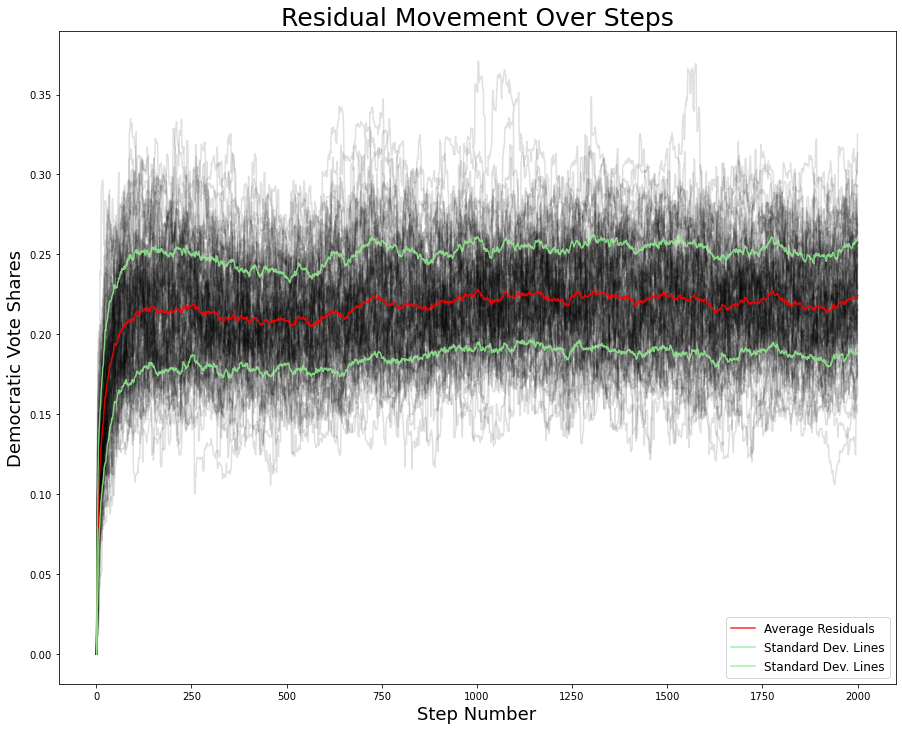

In [2]:
raw_data_5 = read_data('Week_Run_e5.csv')
enacted_plan = read_enact()

data_5 = data_prep(raw_data_5, enacted_plan)
print(data_5)

avg_5 = agg_nums(data_5, 0)
upper_std_5, lower_std_5 = agg_nums(data_5, 1)
med_5 = agg_nums(data_5, 2)

plotting(data_5, avg_5, upper_std_5, lower_std_5, med_5);

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


        RunNum     StepNum    Resid
0            0    1.000000 0.000000
1            0    2.000000 0.085768
2            0    3.000000 0.100818
3            0    4.000000 0.118065
4            0    5.000000 0.132741
...        ...         ...      ...
199995      99 1996.000000 0.209154
199996      99 1997.000000 0.209064
199997      99 1998.000000 0.208133
199998      99 1999.000000 0.206098
199999      99 2000.000000 0.208102

[200000 rows x 3 columns]


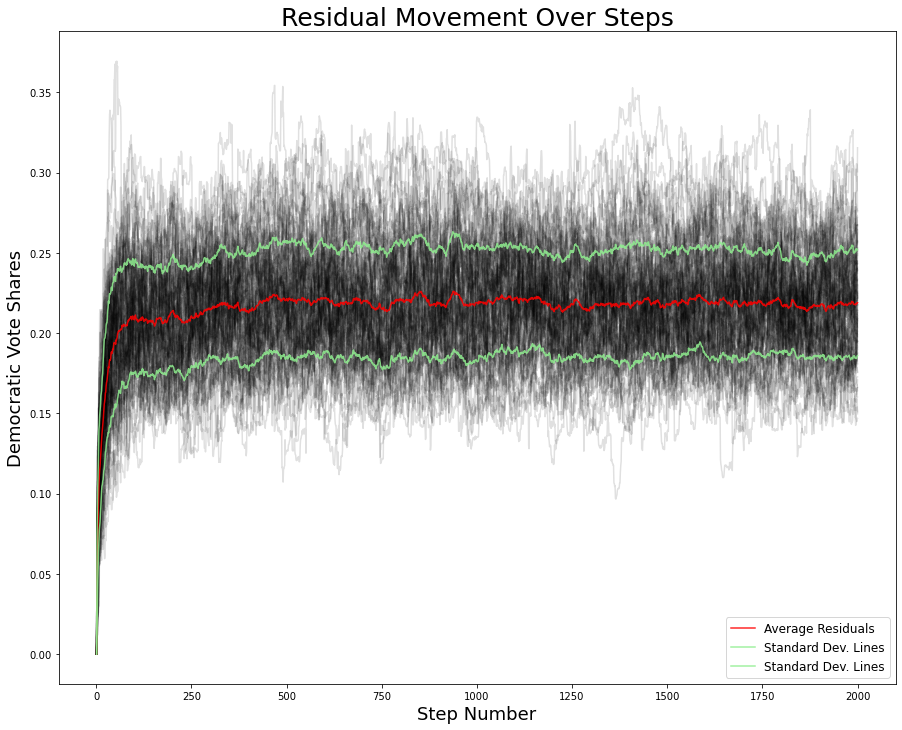

In [3]:
raw_data_10 = read_data('Week_Run_e10.csv')
enacted_plan = read_enact()

data_10 = data_prep(raw_data_10, enacted_plan)
print(data_10)

avg_10 = agg_nums(data_10, 0)
upper_std_10, lower_std_10 = agg_nums(data_10, 1)
med_10 = agg_nums(data_10, 2)

plotting(data_10, avg_10, upper_std_10, lower_std_10, med_10);

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


        RunNum     StepNum    Resid
0            0    1.000000 0.000000
1            0    2.000000 0.085768
2            0    3.000000 0.091012
3            0    4.000000 0.095743
4            0    5.000000 0.097971
...        ...         ...      ...
199995      99 1996.000000 0.220133
199996      99 1997.000000 0.220160
199997      99 1998.000000 0.219519
199998      99 1999.000000 0.217987
199999      99 2000.000000 0.218784

[200000 rows x 3 columns]


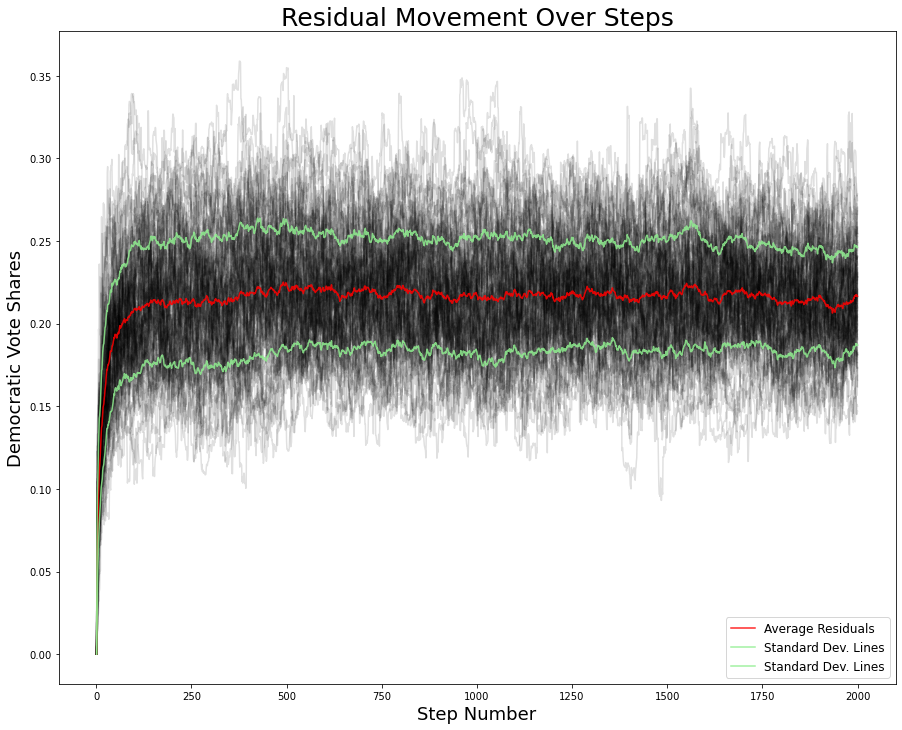

In [4]:
raw_data_15 = read_data('Week_Run_e15.csv')
enacted_plan = read_enact()

data_15 = data_prep(raw_data_15, enacted_plan)
print(data_15)

avg_15 = agg_nums(data_15, 0)
upper_std_15, lower_std_15 = agg_nums(data_15, 1)
med_15 = agg_nums(data_15, 2)

plotting(data_15, avg_15, upper_std_15, lower_std_15, med_15);

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


        RunNum     StepNum    Resid
0            0    1.000000 0.000000
1            0    2.000000 0.038059
2            0    3.000000 0.053611
3            0    4.000000 0.056708
4            0    5.000000 0.080158
...        ...         ...      ...
199995      99 1996.000000 0.222292
199996      99 1997.000000 0.157789
199997      99 1998.000000 0.158317
199998      99 1999.000000 0.154701
199999      99 2000.000000 0.155470

[200000 rows x 3 columns]


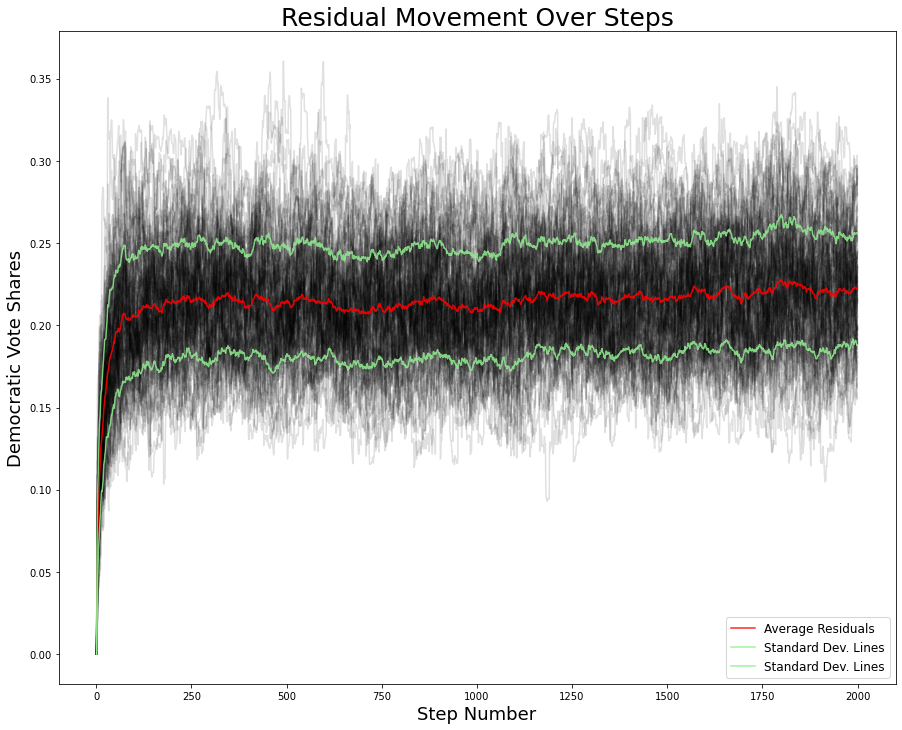

In [5]:
raw_data_20 = read_data('Week_Run_e20.csv')
enacted_plan = read_enact()

data_20 = data_prep(raw_data_20, enacted_plan)
print(data_20)

avg_20 = agg_nums(data_20, 0)
upper_std_20, lower_std_20 = agg_nums(data_20, 1)
med_20 = agg_nums(data_20, 2)

plotting(data_20, avg_20, upper_std_20, lower_std_20, med_20);

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


        RunNum     StepNum    Resid
0            0    1.000000 0.000000
1            0    2.000000 0.067764
2            0    3.000000 0.076751
3            0    4.000000 0.083538
4            0    5.000000 0.097290
...        ...         ...      ...
199995      99 1996.000000 0.262240
199996      99 1997.000000 0.289570
199997      99 1998.000000 0.289196
199998      99 1999.000000 0.264467
199999      99 2000.000000 0.264650

[200000 rows x 3 columns]


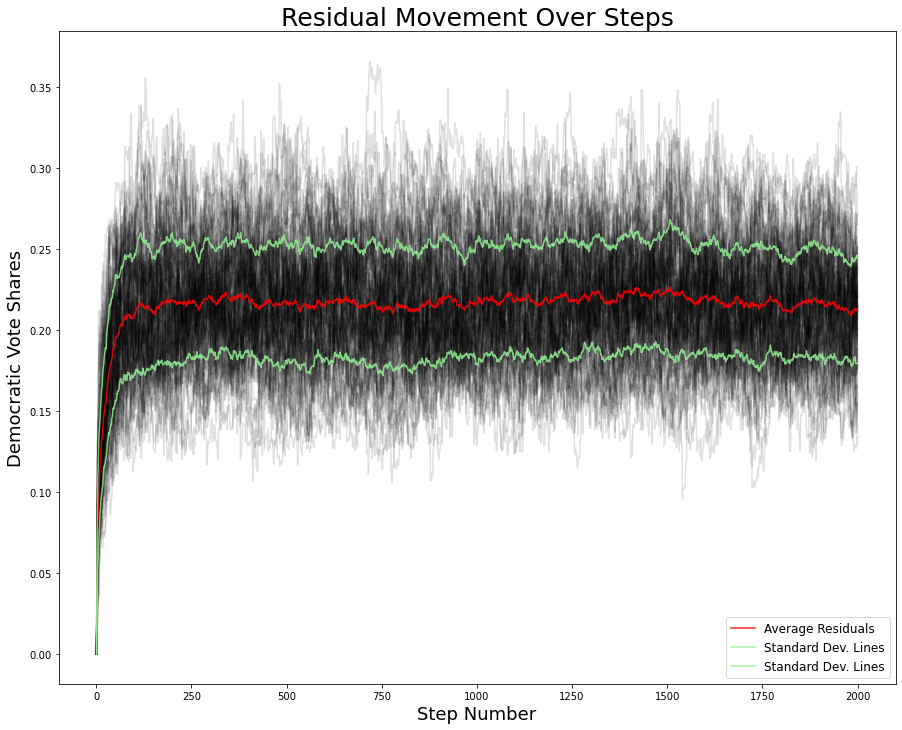

In [6]:
raw_data_25 = read_data('Week_Run_e25.csv')
enacted_plan = read_enact()

data_25 = data_prep(raw_data_25, enacted_plan)
print(data_25)

avg_25 = agg_nums(data_25, 0)
upper_std_25, lower_std_25 = agg_nums(data_25, 1)
med_25 = agg_nums(data_25, 2)

plotting(data_25, avg_25, upper_std_25, lower_std_25, med_25);

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


        RunNum     StepNum    Resid
0            0    1.000000 0.000000
1            0    2.000000 0.040676
2            0    3.000000 0.063621
3            0    4.000000 0.048134
4            0    5.000000 0.067258
...        ...         ...      ...
199995      99 1996.000000 0.228607
199996      99 1997.000000 0.224305
199997      99 1998.000000 0.223625
199998      99 1999.000000 0.217211
199999      99 2000.000000 0.218246

[200000 rows x 3 columns]


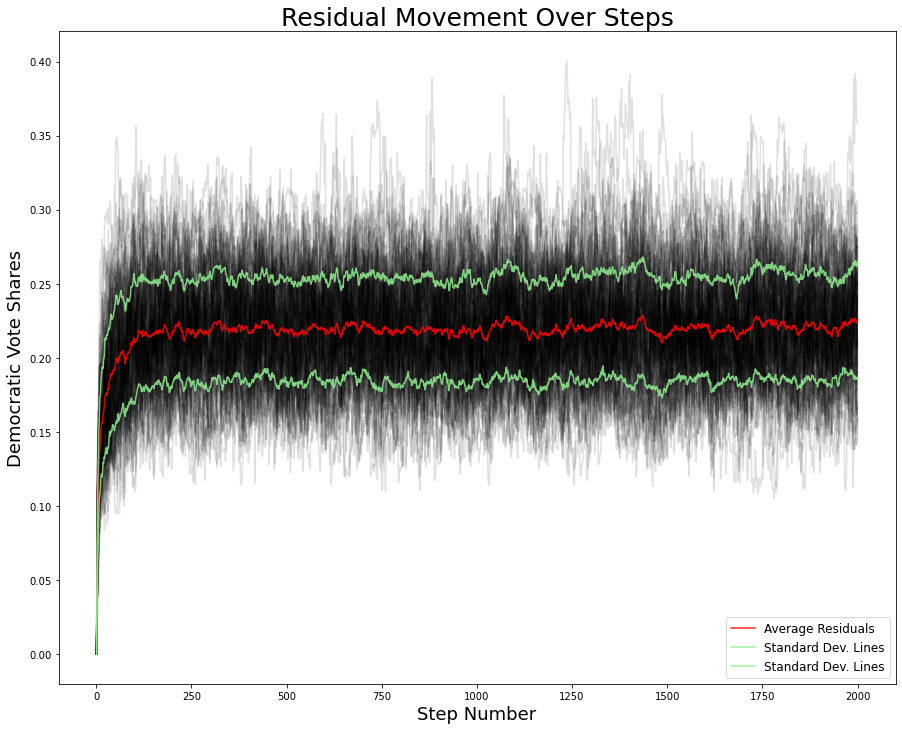

In [7]:
raw_data_50 = read_data('Week_Run_e50.csv')
enacted_plan = read_enact()

data_50 = data_prep(raw_data_50, enacted_plan)
print(data_50)

avg_50 = agg_nums(data_50, 0)
upper_std_50, lower_std_50 = agg_nums(data_50, 1)
med_50 = agg_nums(data_50, 2)

plotting(data_50, avg_50, upper_std_50, lower_std_50, med_50);

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/tljh/user/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

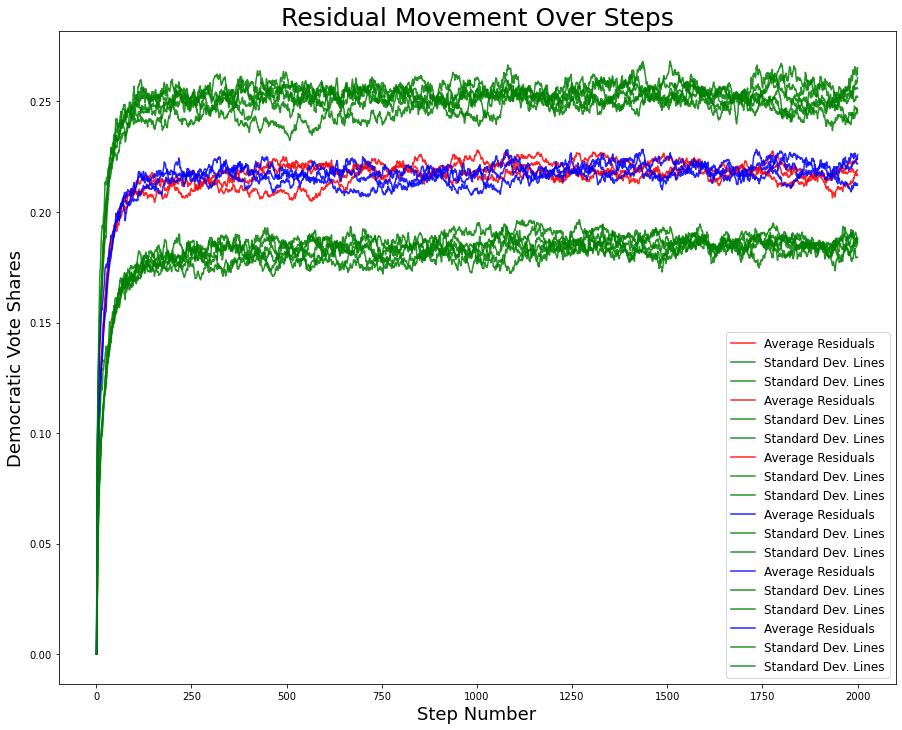

In [8]:
fig, ax = plt.subplots(figsize=(15,12))
for n in [5, 10, 15, 20, 25, 50]:
    raw_data = read_data('Week_Run_e{0}.csv'.format(n))
    enacted_plan = read_enact()

    data = data_prep(raw_data, enacted_plan)
    avg = agg_nums(data, 0)
    upper_std, lower_std = agg_nums(data, 1)
    
    if (n < 20):
        ax.plot(avg.loc[:, ['StepNum']], avg.loc[:, ['Resid']], label="Average Residuals", alpha=.85, color="red")
        ax.plot(upper_std.loc[:, ['StepNum']], upper_std.loc[:, ['Resid']], label="Standard Dev. Lines", alpha=.85, color="green")
        ax.plot(lower_std.loc[:, ['StepNum']], lower_std.loc[:, ['Resid']], label="Standard Dev. Lines", alpha=.85, color="green")
    else:
        ax.plot(avg.loc[:, ['StepNum']], avg.loc[:, ['Resid']], label="Average Residuals", alpha=.85, color="blue")
        ax.plot(upper_std.loc[:, ['StepNum']], upper_std.loc[:, ['Resid']], label="Standard Dev. Lines", alpha=.85, color="green")
        ax.plot(lower_std.loc[:, ['StepNum']], lower_std.loc[:, ['Resid']], label="Standard Dev. Lines", alpha=.85, color="green")

#ax.plot(med.loc[:, ['StepNum']], med.loc[:, ['Resid']], label="Median Residuals", alpha=.7, color="blue")
#ax.plot(upper_std.loc[:, ['StepNum']], upper_std.loc[:, ['Resid']], label="Standard Dev. Lines", alpha=.85, color="lightgreen")
#ax.plot(lower_std.loc[:, ['StepNum']], lower_std.loc[:, ['Resid']], label="Standard Dev. Lines", alpha=.85, color="lightgreen")

ax.set_title("Residual Movement Over Steps", fontsize=25)
ax.set_ylabel("Democratic Vote Shares", fontsize=18)
ax.set_xlabel("Step Number", fontsize=18)
ax.legend(loc=4, fontsize='large')

plt.show()

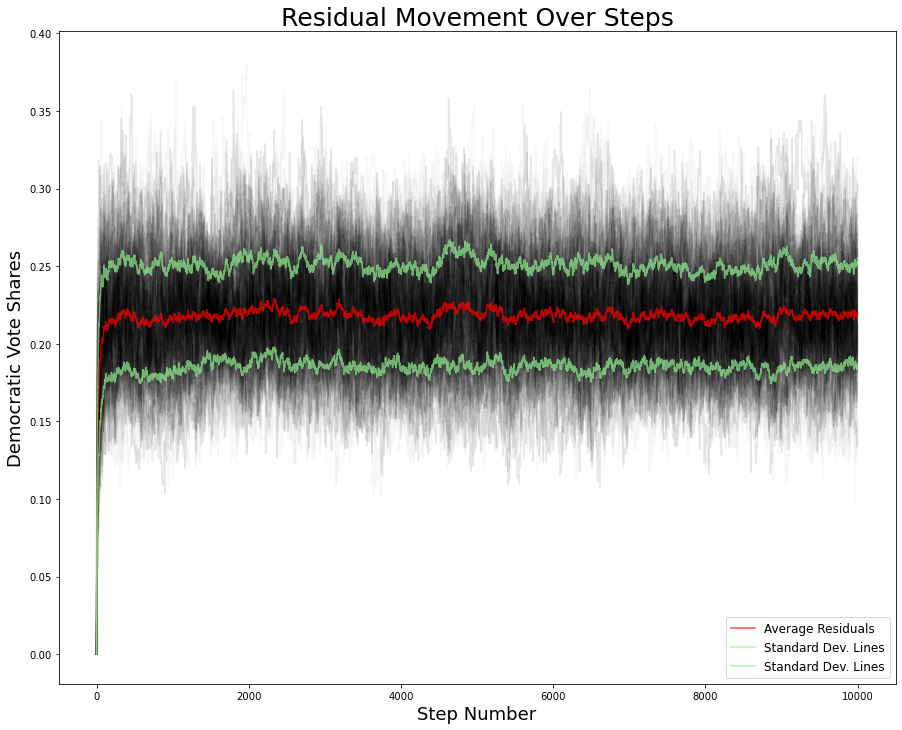